# Proyek Analisis Data: Analisis Data Sharing Sepeda Berdasarkan Faktor Faktor Eksternal untuk Mengetahui Pola Penggunaan

- Nama: Aqilah Nurfaidah Ammardinah
- Email: aqilahnfard@gmail.com
- Id Dicoding: @nuffavoy

## Menentukan Pertanyaan Bisnis

- Bagaimana Hubungan Antara Cuaca dengan Minat Pengguna Dalam Sharing Sepeda Selama 4 Musim?
- Berapa Banyak Perbedaan Sharing Antara Hari Kerja dan Hari Libur?
- Pada Pukul Berapa Pengguna Paling Aktif Dalam Sharing Sepeda?

## Menyiapkan semua library yang dibutuhkan

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

**Mengambil dataset hour.csv**

In [91]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/aqilahnuffa/tugas_akhir/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Tabel** `hour_df`

In [92]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan type data pada **dteday**

**Cek deskripsi** `hour_df`

In [93]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Mencari missing value**

In [94]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Mencari duplicated data**

In [95]:
hour_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

### Cleaning Data

In [96]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())
hour_df.isna().sum()

Jumlah duplikasi :  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Mengganti nama kolom** `hour_df`

In [97]:
hour_df.rename(columns=lambda x: x.replace("dteday", "date"), inplace=True)
hour_df.rename(columns=lambda x: x.replace("yr", "year"), inplace=True)
hour_df.rename(columns=lambda x: x.replace("mnth", "month"), inplace=True)
hour_df.rename(columns=lambda x: x.replace("hr", "hour"), inplace=True)
hour_df.rename(columns=lambda x: x.replace("cnt", "all_user"), inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  all_user    17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengganti value column SEASON, YEAR, MONTH, WEATHERSIT dan WORKINGDAY**

In [98]:
season_mapping = {1: "Spring", 2: "Summer",
                  3: "Fall", 4: "Winter"}
hour_df['season'] = hour_df['season'].map(season_mapping)

year_mapping = {0: "2011", 1: "2012"}
hour_df['year'] = hour_df['year'].map(year_mapping)

month_mapping = {
    1: "January", 2: "February", 3: "March",
    4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September",
    10: "October", 11: "November", 12: "December"}
hour_df['month'] = hour_df['month'].map(month_mapping)

weathersit_mapping = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
		2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
		3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
		4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

workingday_mapping = {0: "holiday_weekend", 1: "work_day"}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)


print(hour_df['workingday'])

0        holiday_weekend
1        holiday_weekend
2        holiday_weekend
3        holiday_weekend
4        holiday_weekend
              ...       
17374           work_day
17375           work_day
17376           work_day
17377           work_day
17378           work_day
Name: workingday, Length: 17379, dtype: object


**Memperbaiki tipe data DATE**

In [99]:
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [100]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,all_user
0,1,2011-01-01,Spring,2011,January,0,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [101]:
hour_df.nunique()

instant       17379
date            731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
all_user        869
dtype: int64

**Cek ulang informasi** `hour_df`

In [102]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  object        
 4   month       17379 non-null  object        
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  all_user    17379 non-

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

**Ambil 5 contoh data**

In [103]:
hour_df.sample(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,all_user
8673,8674,2012-01-02,Spring,2012,January,5,1,1,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.28,0.2576,0.45,0.3284,1,3,4
338,339,2011-01-15,Spring,2011,January,14,0,6,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.30,0.2879,0.39,0.2836,26,92,118
12276,12277,2012-05-31,Summer,2012,May,17,0,4,work_day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.76,0.6667,0.31,0.1642,85,742,827
10319,10320,2012-03-11,Spring,2012,March,1,0,0,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2424,0.52,0.1642,4,57,61
2137,2138,2011-04-03,Summer,2011,April,22,0,0,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.40,0.4091,0.43,0.1045,7,29,36


**Lihat keterangan data**

In [104]:
hour_df.describe(include="all")

<ipython-input-104-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,all_user
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,NaN,work_day,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,2.005771,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [105]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  object        
 4   month       17379 non-null  object        
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  all_user    17379 non-

**Cek apakah tipe data instant adalah unik**

In [106]:
hour_df.instant.is_unique

True

In [107]:
hour_df.groupby(by='date').agg({
    "date": ["min", "max"]
  })

date           
                  min        max
date                            
2011-01-01 2011-01-01 2011-01-01
2011-01-02 2011-01-02 2011-01-02
2011-01-03 2011-01-03 2011-01-03
2011-01-04 2011-01-04 2011-01-04
2011-01-05 2011-01-05 2011-01-05
...               ...        ...
2012-12-27 2012-12-27 2012-12-27
2012-12-28 2012-12-28 2012-12-28
2012-12-29 2012-12-29 2012-12-29
2012-12-30 2012-12-30 2012-12-30
2012-12-31 2012-12-31 2012-12-31

[731 rows x 2 columns]

**Total pengguna berdasarkan Tahun**

In [108]:
hour_df.groupby(by='year').agg({
    "all_user": ["min", "max", "sum"]
})

all_user              
          min  max      sum
year                       
2011        1  651  1243103
2012        1  977  2049576

**Membuat pivot table : mengurutkan pengguna berdasarkan Season**

In [109]:
hour_df.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "all_user": ["min", "max", "sum"]
})

casual registered all_user              
           sum        sum      min  max      sum
season                                          
Fall    226091     835038        1  977  1061129
Spring   60622     410726        1  801   471348
Summer  203522     715067        1  957   918589
Winter  129782     711831        1  967   841613

**Cek distribusi season paling tinggi**

In [110]:
hour_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: instant, dtype: int64

**Membuat pivot table : mengurutkan pengguna berdasarkan Hari kerja dan hari libur**

In [111]:
hour_df.groupby(by='workingday').agg({
    "all_user": "sum"
})

,all_user
workingday,
holiday_weekend,1000269
work_day,2292410


**Membuat pivot table : Mengurutkan pengguna berdasarkan tahun dan musim**

In [112]:
hour_df.groupby(['year', 'season']).agg({
    "all_user": "sum"
})

all_user
year season          
2011 Fall      419650
     Spring    150000
     Summer    347316
     Winter    326137
2012 Fall      641479
     Spring    321348
     Summer    571273
     Winter    515476

**Membuat pivot table : Mengurutkan pengguna berdasarkan cuaca**

In [113]:
hour_df.groupby('season').agg({
    "all_user": ["min", "max", "sum"]
})

all_user              
            min  max      sum
season                       
Fall          1  977  1061129
Spring        1  801   471348
Summer        1  957   918589
Winter        1  967   841613

**Membuat pivot table : mengurutkan pengguna berdasarkan Waktu**

In [114]:
hour_df.groupby(by='hour').agg({
    "all_user": ["min", "max", "mean", "std", "sum"]
})

all_user                                     
          min  max        mean         std     sum
hour                                              
0           2  283   53.898072   42.307910   39130
1           1  168   33.375691   33.538727   24164
2           1  132   22.869930   26.578642   16352
3           1   79   11.727403   13.239190    8174
4           1   28    6.352941    4.143818    4428
5           1   66   19.889819   13.200765   14261
6           1  213   76.044138   55.084348   55132
7           1  596  212.064649  161.441936  154171
8           5  839  359.011004  235.189285  261001
9          14  426  219.309491   93.703458  159438
10          8  539  173.668501  102.205413  126257
11         10  663  208.143054  127.495536  151320
12          3  776  253.315934  145.081134  184414
13         11  760  253.661180  148.107657  184919
14         12  750  240.949246  147.271574  175652
15          7  750  251.233196  144.632541  183149
16         11  783  311.983562  148.682618  227748
17         15  976  461.452055  232.656611  336860
18         23  977  425.510989  224.639304  309772
19         11  743  311.523352  161.050359  226789
20         11  567  226.030220  119.670164  164550
21          6  584  172.314560   89.788893  125445
22          9  502  131.335165   69.937782   95612
23          2  256   87.831044   50.846889   63941

## Visualization & Explanatory Analysis

### Bagaimana Hubungan Antara Cuaca dengan Minat Pengguna Dalam Sharing Sepeda Selama 4 Musim?

In [115]:
hour_df.sample(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,all_user
5751,5752,2011-09-02,Fall,2011,September,2,0,5,work_day,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.62,0.5909,0.73,0.1045,9,11,20
12179,12180,2012-05-27,Summer,2012,May,16,0,0,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.78,0.7121,0.52,0.2836,258,243,501
15857,15858,2012-10-27,Winter,2012,October,22,0,6,holiday_weekend,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.52,0.5000,0.72,0.2537,41,116,157
9000,9001,2012-01-15,Spring,2012,January,21,0,0,holiday_weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.16,0.1667,0.40,0.1642,1,71,72
1201,1202,2011-02-23,Spring,2011,February,2,0,3,work_day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.12,0.1515,0.50,0.1343,0,1,1


**Distribusi pengguna dalam 4 musim**

Mencari pengguna terbanyak dalam keempat musim menggunakan visualisasi Bar chart

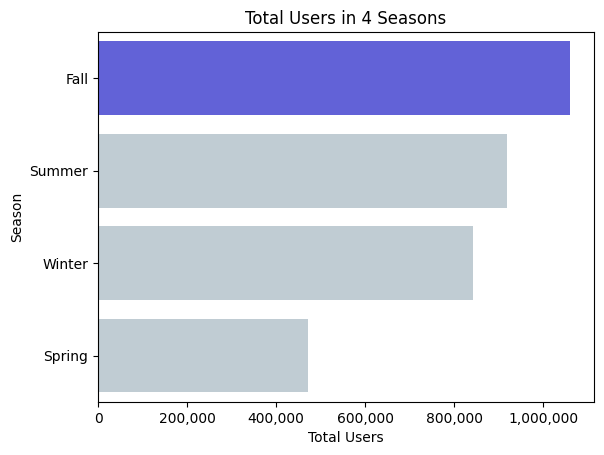

In [116]:
user = hour_df.groupby('season')['all_user'].sum()

season_data = pd.DataFrame({'Season': user.index, 'Total Users': user.values})
season_data = season_data.sort_values(by='Total Users', ascending=False)
color = ['#4E4FEB', '#BDCDD6', '#BDCDD6', '#BDCDD6']

ax = sns.barplot(
    data=season_data,
    x="Total Users",
    y="Season",
    orient="h",
    palette=color)
plt.xlabel("Total Users")
plt.title("Total Users in 4 Seasons")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.show()

**Distribusi pengguna berdasarkan Musim dan Cuaca**

In [117]:
hour_df.groupby(['season', 'weathersit']).agg({
    "weathersit": "count",
    "all_user": "sum"
})

weathersit  \
season weathersit                                                       
Fall   Clear, Few clouds, Partly cloudy, Partly cloudy           3280   
       Light Snow, Light Rain + Thunderstorm + Scatter...         269   
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...         947   
Spring Clear, Few clouds, Partly cloudy, Partly cloudy           2665   
       Heavy Rain + Ice Pallets + Thunderstorm + Mist,...           3   
       Light Snow, Light Rain + Thunderstorm + Scatter...         369   
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...        1205   
Summer Clear, Few clouds, Partly cloudy, Partly cloudy           2859   
       Light Snow, Light Rain + Thunderstorm + Scatter...         406   
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...        1144   
Winter Clear, Few clouds, Partly cloudy, Partly cloudy           2609   
       Light Snow, Light Rain + Thunderstorm + Scatter...         375   
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...        1248   

                                                           all_user  
season weathersit                                                    
Fall   Clear, Few clouds, Partly cloudy, Partly cloudy       801941  
       Light Snow, Light Rain + Thunderstorm + Scatter...     46256  
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...    212932  
Spring Clear, Few clouds, Partly cloudy, Partly cloudy       325278  
       Heavy Rain + Ice Pallets + Thunderstorm + Mist,...       223  
       Light Snow, Light Rain + Thunderstorm + Scatter...     21642  
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...    124205  
Summer Clear, Few clouds, Partly cloudy, Partly cloudy       664463  
       Light Snow, Light Rain + Thunderstorm + Scatter...     46763  
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...    207363  
Winter Clear, Few clouds, Partly cloudy, Partly cloudy       546491  
       Light Snow, Light Rain + Thunderstorm + Scatter...     43670  
       Mist + Cloudy, Mist + Broken clouds, Mist + Few...    251452

Terlihat bahwa selama musim semi, terdapat situasi cuaca yang mencakup kondisi ekstrem sebanyak 3 kali

### Berapa Banyak Perbedaan Sharing Antara Hari Kerja dan Hari Libur?

In [118]:
hour_df.groupby('workingday').agg({
    "all_user": "sum"
})

,all_user
workingday,
holiday_weekend,1000269
work_day,2292410


**Mencari perbedaan antara Hari kerja dan Hari libur**

In [119]:
workday = hour_df[hour_df['workingday'] == 'work_day']['all_user'].sum()
holiday = hour_df[hour_df['workingday'] == 'holiday_weekend']['all_user'].sum()
difference = workday - holiday
print("Holiday User :", holiday.sum())
print("Workday User :", workday.sum())
print("Perbedaan User :", difference)

Holiday User : 1000269
Workday User : 2292410
Perbedaan User : 1292141


Melakukan visualisasi data menggunakan Bar Chart untuk memperoleh informasi pengguna berdasarkan hari kerja dan hari libur

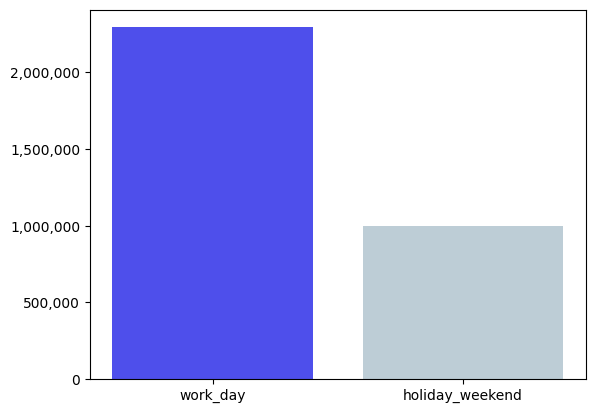

In [120]:
workingday = hour_df.groupby('workingday')['all_user'].sum()
workingday_data = pd.DataFrame({'workingday': workingday.index, 'Total Users': workingday.values})
workingday_data = workingday_data.sort_values(by='Total Users', ascending=False)
color = ['#4E4FEB', '#BDCDD6']

ax = plt.bar(
    data=workingday_data,
    x="workingday",
    height="Total Users",
    color=color
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.show()


### Pada Pukul Berapa Pengguna Paling Aktif Dalam Sharing sepeda?

Untuk mengetahui periode waktu paling aktif, kita akan menggunakan visualisasi Line chart untuk mendapatkan informasi terkait pengguna terbanyak berdasarkan waktu

<function matplotlib.pyplot.show(close=None, block=None)>

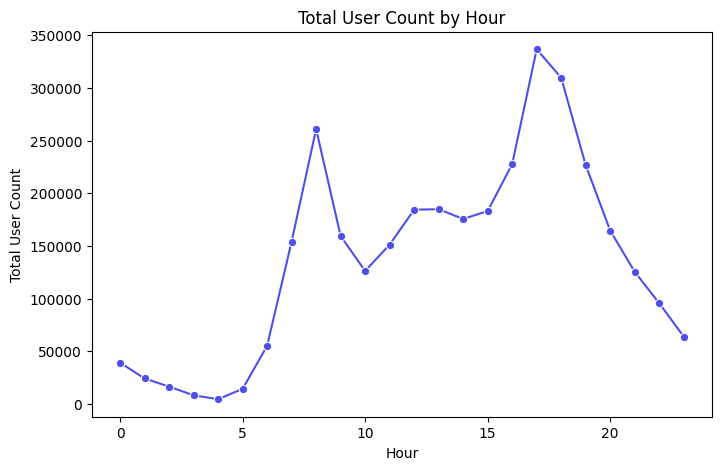

In [121]:
user_count = hour_df.groupby('hour')['all_user'].sum().reset_index()
color = '#4E4FEB'

plt.figure(figsize=(8,5))
sns.lineplot(
    data=user_count,
    x="hour",
    y="all_user",
    marker="o",
    color=color)
plt.xlabel("Hour")
plt.ylabel("Total User Count")
plt.title("Total User Count by Hour")

plt.show

## Conclusion

- **Pada analisa pertama, kita dapat melihat bahwa terdapat hubungan antara cuaca dan juga minat pengguna pada keempat musim, Musim gugur merupakan musim dengan jumlah pengguna penyewa terbanyak, diikuti oleh Musim panas, Musim dingin dan terakhir Musim semi, sementara itu faktor lain seperti kondisi cuaca juga turut berkontribusi dalam perubahan pada minat pengguna, selama Musim semi terdapat situasi cuaca yang mencakup kondisi ekstrem seperti hujan lebat, petir dan lainnya. hal ini menunjukkan bahwa selama Musim semi, terdapat cuaca yang lebih tidak menguntungkan yang dapat mempengaruhi minat pengguna dalam layanan penyewaan sepeda.**

- **Pada hari kerja, jumlah pengguna yang menggunakan layanan penyewaan sepeda mencapai angka 2,292,410 pengguna, sedangkan pada hari libur, pengguna sewa sepeda tercatat sebanyak 1,000,269 pengguna, hal ini menunjukkan bahwa lebih banyak pengguna berpartisipasi dalam penyewaan selama hari kerja dibandingkan hari libur.**

- **Berdasarkan visualisasi data di atas, kita dapat mengetahui bahwa pengguna paling aktif menggunakan layanan penyewaan sepeda pada pukul 8 pagi hari, selain itu, pengguna juga aktif pada sore hari antara pukul 4 hingga pukul 7 malam. hal ini menunjukkan bahwa dua periode waktu ini adalah yang paling populer bagi pengguna dalam menggunakan layanan penyewaan sepeda.**

In [122]:
hour_df.to_csv("bike_sharing.csv", index=False)